In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
df = pd.read_excel("C:\\Users\\dhuma\\Downloads\\Pumpkin_Seeds_Dataset.xlsx")

In [7]:
pip install openyxl


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement openyxl (from versions: none)
ERROR: No matching distribution found for openyxl


In [8]:
pip install openpyxl

  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/250.9 kB 245.8 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.9 kB 328.2 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/250.9 kB 353.1 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 375.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 375.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 375.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 375.8 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 403.5 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 403.5 kB/s et

In [9]:
print(df.shape)

NameError: name 'df' is not defined

In [11]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape

(2500, 12)

In [16]:
y.shape

(2500,)

In [17]:
#3 splitting data into training and testing


In [18]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.50, random_state= 42)

In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state = 42)

In [21]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# prediction


In [23]:
y_pred = rf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{ accuracy:2f}')

accuracy_percent= round(accuracy,2)
print("Accuracy is :", accuracy_percent*100,"%")

Accuracy:0.867200
Accuracy is : 87.0 %


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)

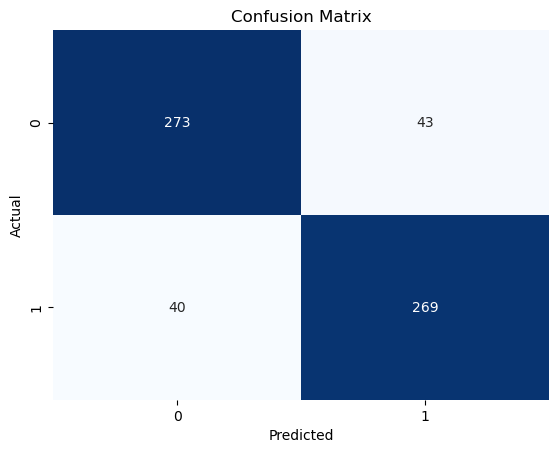

In [29]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
feature_importances = rf.feature_importances_

In [32]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

C:\Users\dhuma\AppData\Local\Temp\ipykernel_4144\1463805296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')


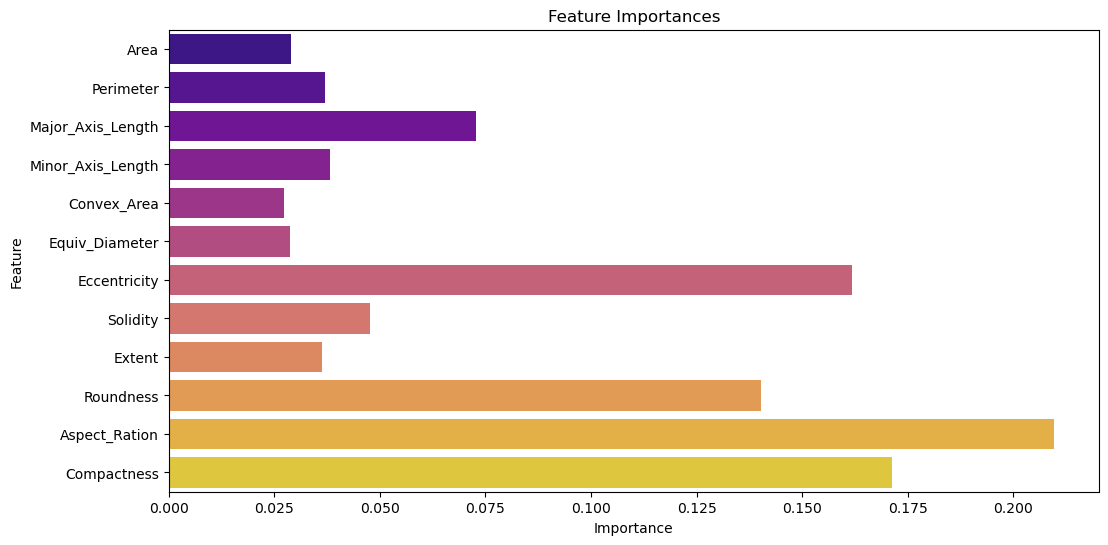

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='plasma')
plt.title('Feature Importances')
plt.show()